Import resources and display image

In [ ]:
!pip install opencv-contrib-python==4.3.0.38

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

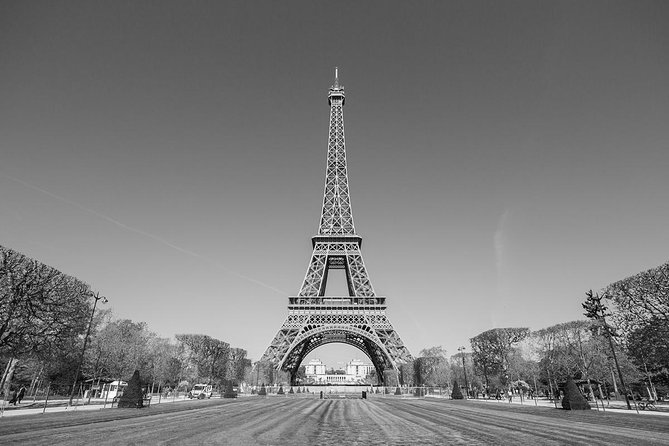

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


#load image
image1 = cv2.imread('/content/drive/My Drive/Datasets/ISPR/SIFT-Images/2.jpg')

#convert image to approriate RGB format since openCV uses BGR to load images and greyscale
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(training_gray)

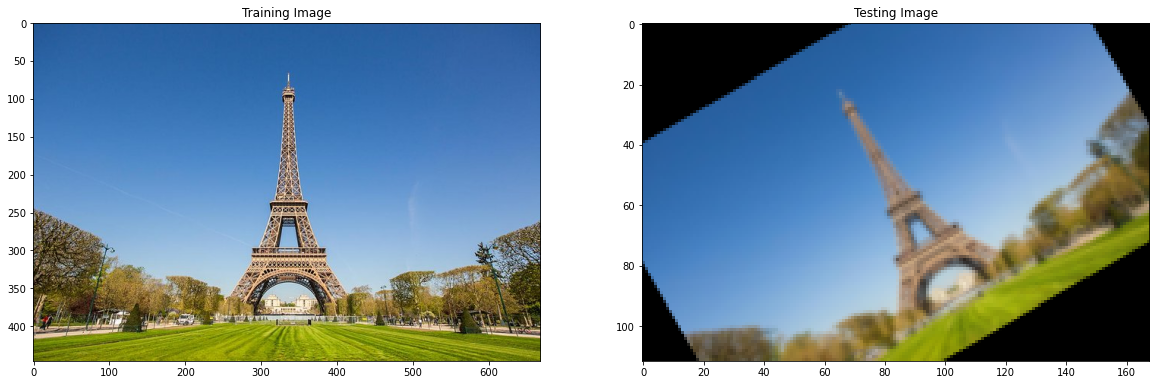

In [3]:
# Create test image by adding Scale Incariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)

num_rows, num_cols = test_image.shape[:2]

rotation_matrix=cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Detect keypoints and Create Descriptor

In [18]:
#The number of layers in each octave. 3 is the value used in D. Lowe paper. 
#The number of octaves is computed automatically from the image resolution.
nOctaveLayers = 3

sift = cv2.xfeatures2d.SIFT_create(nOctaveLayers=nOctaveLayers)

#sift.detect finds keypoints
#sift.compute creates the descriptors from keypoints
train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
#keypoints 
# The detected keypoints. A 1-by-N structure array with the following fields:
# pt coordinates of the keypoint [x,y]
# size diameter of the meaningful keypoint neighborhood
# angle computed orientation of the keypoint (-1 if not applicable); it's in [0,360) degrees and measured relative to image coordinate system (y-axis is directed downward), i.e in clockwise.
# response the response by which the most strong keypoints have been selected. Can be used for further sorting or subsampling.
# octave (pyramid layer) from which the keypoint has been extracted.
# class_id object class (if the keypoints need to be clustered by an object they belong to).
#descriptors 
# Computed descriptors. Output concatenated vectors of descriptors. 
# Each descriptor is a 128-element vector, as returned by cv.SIFT.descriptorSize, so the total size of descriptors will be numel(keypoints) * obj.descriptorSize().
# A matrix of size N-by-128 of class single, one row per keypoint.



In [ ]:
keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)


cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

#draw a circle with the size of te keypoint
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Number of Keypoints Detected In The Training Image:  1048
Number of Keypoints Detected In The Query Image:  74


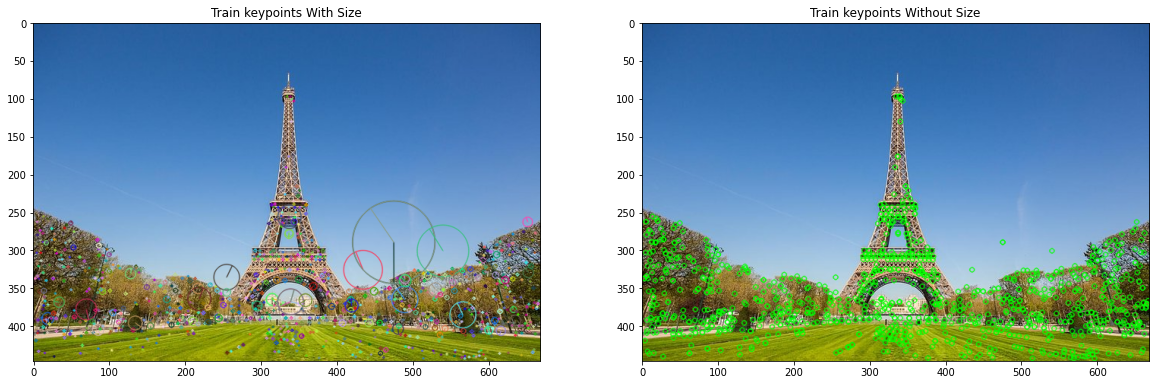

In [9]:
# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Matching Keypoints

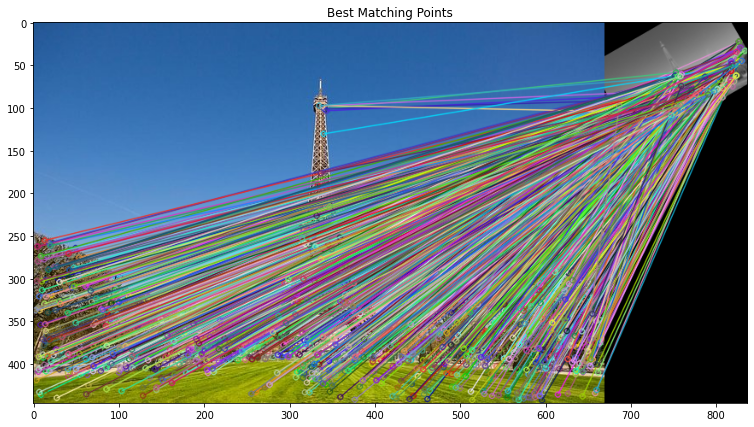


Number of Matching Keypoints Between The Training and Query Images:  1048


In [11]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))